Architecture of a classification model
1. Input layer shape - Same as number of features.
2. Hidden shape - Problem specific(minimum-1 and maximum-unlimited)
3. Neurons per hidden layer - Problem specific, generally 10 to 100
4. Output layer shape - 1(for binary) / 1 per class
5. Hidden activation - usually ReLU
6. Output activation - Sigmoid(for binary classification) / Softmax(for multiclass)
7. Loss function - Cross entropy / categorical cross entropy
8. Optimizer - SGD, Adam

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

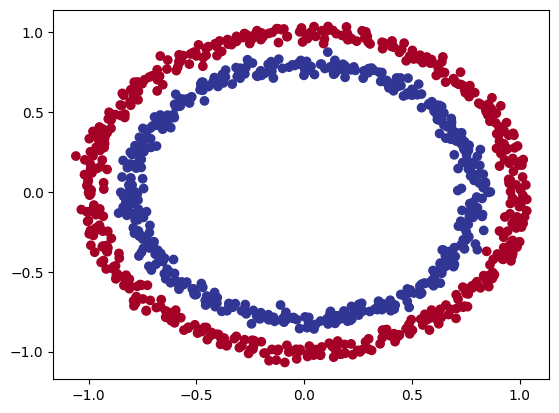

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.1932 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.8793 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7205 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4970


In [9]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Improving the model. Adding one more layer.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933232545852661, 0.5]

### Adding 3 layers now. and changing optimizer to Adam

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add an extra layer
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.8744 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4870
Epoch 11/

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5130


[0.6988850235939026, 0.5130000114440918]

In [14]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


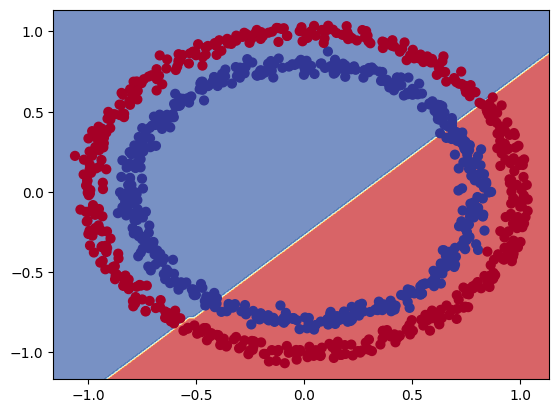

In [15]:
plot_decision_boundary(model_3, X, y)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [17]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 8ms/step - loss: 269.3237 - mae: 269.3237
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 139.2293 - mae: 139.2293
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 52.0180 - mae: 52.0180
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 81.8138 - mae: 81.8138
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 68.4586 - mae: 68.4586
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 45.4167 - mae: 45.4167
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 47.6165 - mae: 47.6165
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 42.1728 - mae: 42.1728
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 42.6179 - mae: 42.6179
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 42.4244 - mae: 42.4244
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 10ms/step


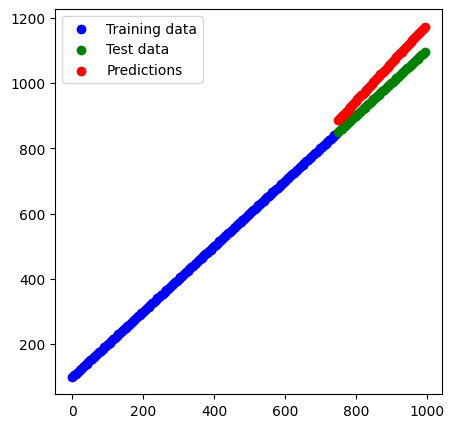

In [20]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(5,5))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();